# K Neighbors and K-D Trees

Classification is one of the fundamental questions in machine learning. Is the tumor malignant or benign? Is the article I'm reading conservative or liberal? Or is it libertarian? Will this investment make me money or lose me money? Anything that deals with labeling a piece of data is a classification problem.

K Neighbors is one of the simplest ways to solve a classification problem. You need a bunch of data points with labels already attatched, and when you get a new piece of data, just check which of your data points it's closest to. Whatever class that point is in, assign that to your new piece of data. K Neighbors (K Nearest Neigbors or KNN) finds the closest point or two points or $k$ points and lets them vote on what the new piece of data should be and takes the class with the most votes.

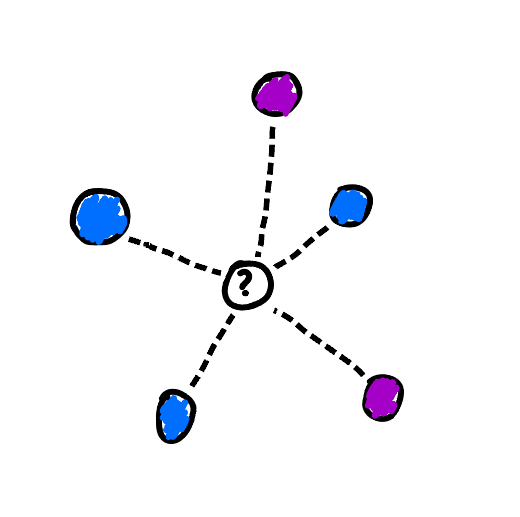

### Measuring Distance

You can measure how close your data points are in a few ways. Pythagorean's Theorem, $a^2+b^2=c^2$, measures the length of the straight line between the two points, $d=\sqrt{x^2+y^2}$, or if you have more than two dimensions, $d=\sqrt{x_1^2+x_2^2+...+x_n^2}$. Manhattan distance measures the shortest path between two points using only vertical and horizontal lines like streets on a grid, $d=x_1+x_2+...+x_n$. In general, a Minkowski metric or norm of order $p$ uses the $p$th root of the sum of coordinates to the $p$th power: $d=\sqrt[p]{\sum_{i=1}^nx_i^p}$. Our regular straight line distance, Euclidean distance, is a Minkowski metric of order $2$ (the 2 norm) and Manhattan distance is order $1$ (the 1 norm).  

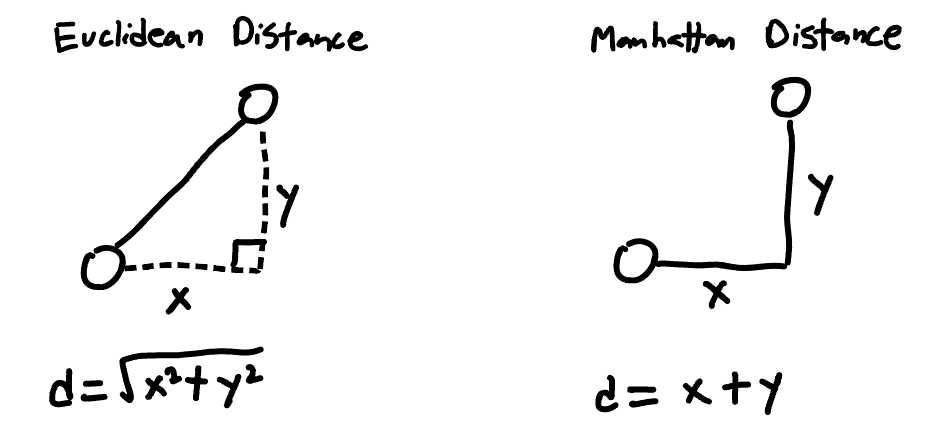

You can let $p$ be whatever you want and get a different decision surface to decide which $k$ points get to vote on a class for your new point. Each will give a different kind of radius to look in. You can even let $p$ equal infinity to get the infinity norm, which picks the dimension where the coordinates are farthest apart (the x dimension, the y dimension, the height dimension, the weight dimension) and uses that as the distance.  

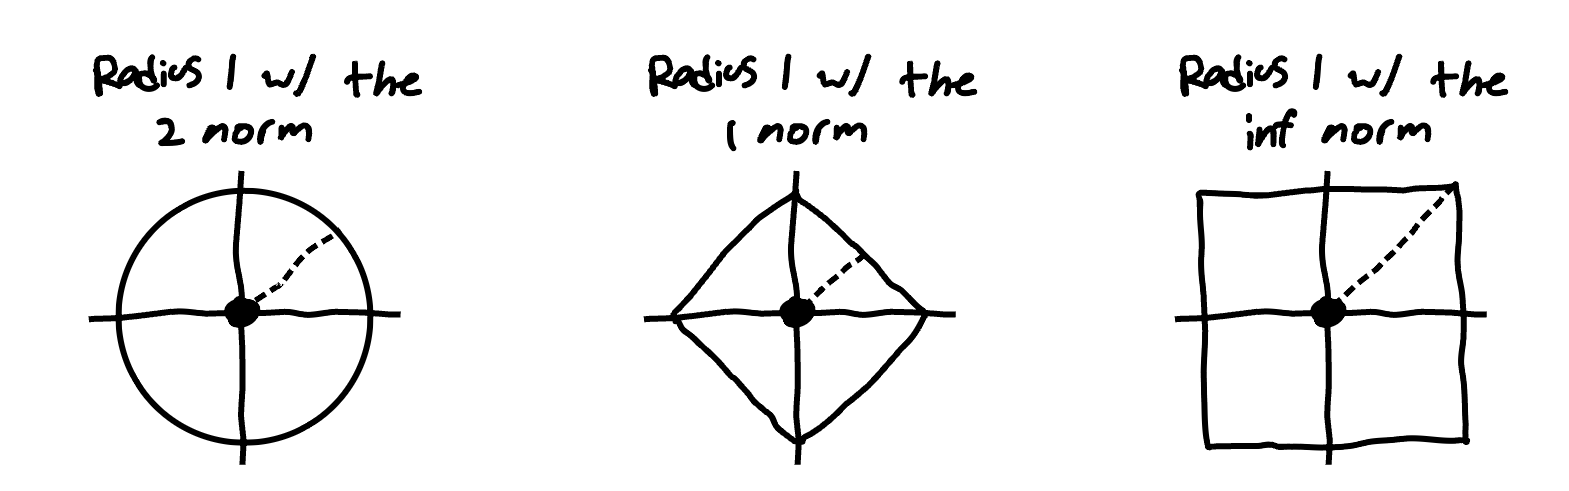

These all represent what it means to be 1 unit away using our new distance metric. Our KNN algorithm would scale this "unit circle" until you find the $k$ points inside the "circle" that are closest to your new one. Those will be the ones that get to vote. Here, play with the slider for $p$ to see what kind of decision surface you get for different values:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# function for the minkowski norm of order p
def minkowski_norm(x,y,p):
    return (np.abs(x)**p + np.abs(y)**p)**(1/p)

# function to plot the unit circle with order p
def plot_unit_circle(p):
    # get a bunch of points on the unit circle and normalize them
    theta = np.linspace(0,2*np.pi,1000)
    x = np.cos(theta)
    y = np.sin(theta)
    r = minkowski_norm(x,y,p)
    
    # then plot them
    plt.plot(x/r,y/r)
    plt.axis('equal')
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    plt.show()

# slider to display the unit circle with order p
slider = interactive(plot_unit_circle, p=(.4,10,.1))
slider

interactive(children=(FloatSlider(value=5.1000000000000005, description='p', max=10.0, min=0.4), Output()), _d…

### Searching for the k Closest Points

Once you've decided how you're measuring distance (and there are lots more ways than just Minkowski metrics), you'll need to search through all of your points to see which $k$ of them are closest to your new one. We aren't actually going to plot them and draw unit circles, we're going to go through a list and measure the distance between each point in our dataset and our new point. There are fast and slow ways to perform search algorithms. The slowest way is to go one by one through the entire list and check each one to find which point is closest. A faster algorithm is binary search. If you have a list of sorted numbers, say $[1,4,9,16,25]$ and you're looking for the number closest to $15$, start in the middle with $9$ and divide the list into the left and right half. Since $15$ is bigger than $9$, you know your number is in the right half, so throw out the left half and start over with the smaller list. You'll find your number a lot faster than just going one by one through the list. You can do the same thing with 2, 3, or as many dimensions as you want, but instead of a list you'll need a different type of data structure called a K-D Tree.  

A K-D Tree is a way to sort data that has $k$ dimensions. This $k$ is different from the $k$ points we're using in our K Nearest Neighbors unfortunately so we'll use $n$ dimensions instead. In an $n$-dimensional tree, the first row corresponds to the first coordinate, the second row to the second coordinate, and so on until you hit $n$, the number of dimensions. Then you start over. At the first layer, you check the first coordinate of your point against the tree to see if you're bigger or smaller. If you're bigger go right, if you're smaller go left. At the second layer compare the second coordinates, and so on. This will let you do your binary search on data that has $n$ dimensions.  

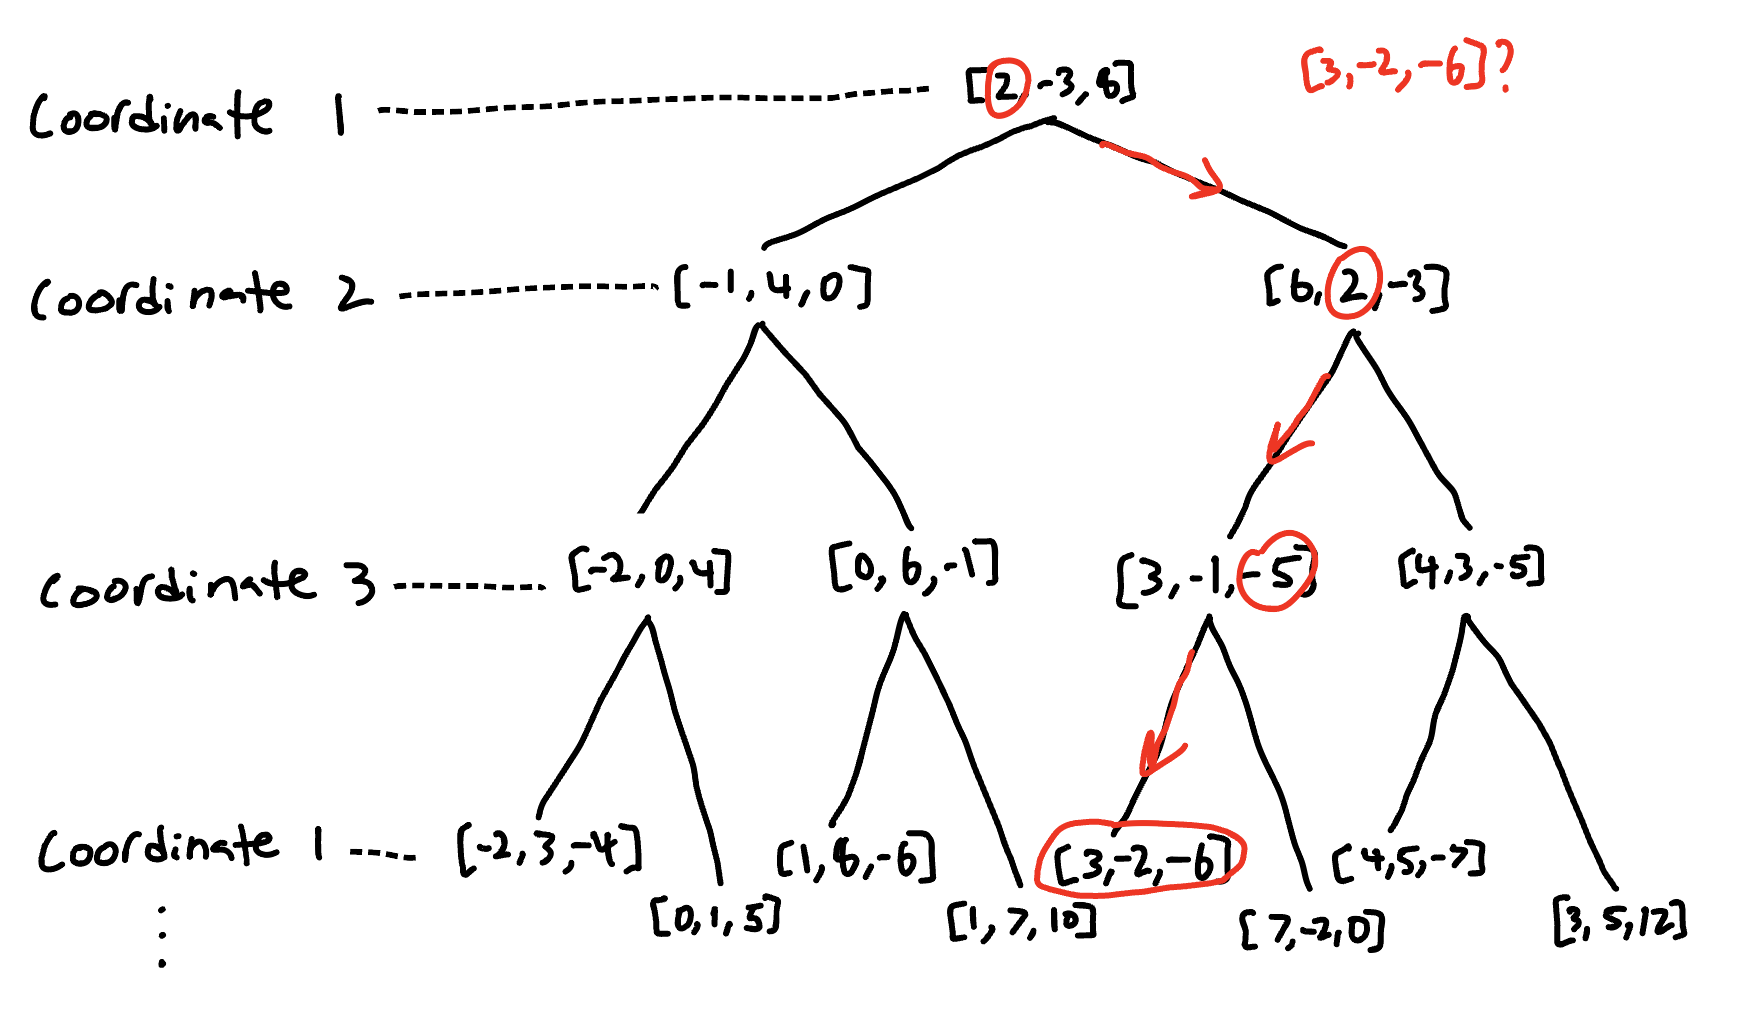

For our KNN algorithm, you're looking for the k closest points to your current one. Instead of comparing your point to every point in the dataset, first search down your $n$-dimensional tree until you get to the bottom. This will narrow your search to points that are already in the same neighborhood as your current point. The points nearby in the tree will be the points nearby with your new distance metric, so you only have to check the points nearby in the tree to see which $k$ of them are the closest. Have those $k$ points vote, and that's the class to assign your new point. If you want, you can even assign each point a weight based on how close it is to your new one and use a weighted average for your vote.

# KNN in Action  

Here's an example of KNN classifying hand drawn numbers. Each "number" is an $8\times8$ pixel image, which can be flattened into one long vector with $8\times8=64$ dimensions. When you input a new "number", it will search through a 64-D Tree of labelled numbers, find the $k$ closest ones, and use that to guess at what number you drew.

Here's an example of what some of our data looks like:


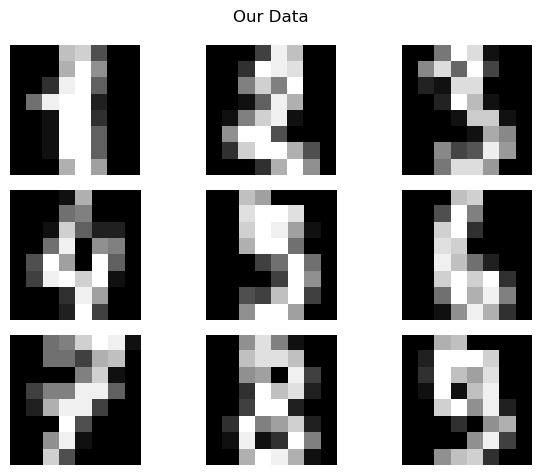

In [2]:
from sklearn import datasets

# import our data
data = datasets.load_digits()
X = data['data']
y = data['target']

# plot some examples
print("Here's an example of what some of our data looks like:")
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X[i+1].reshape((8,8)),cmap='gray')
    plt.axis('off')

plt.suptitle('Our Data')
plt.tight_layout()
plt.show()

If we take a random sample of digits, we can see how well the model does


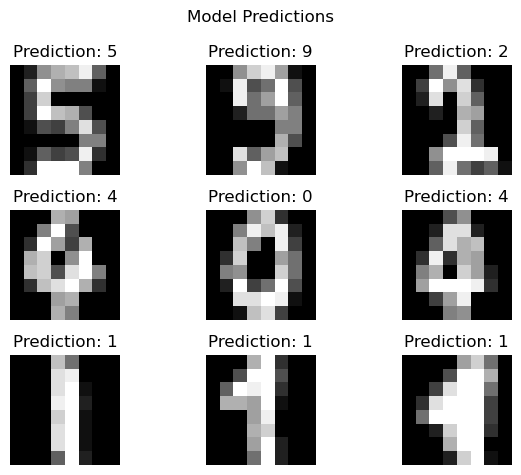

This test set has 450 points in it, and our model guessed right on 97.56% of them.


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X,y)

# fit our model
KNN = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,algorithm='kd_tree')
KNN.fit(X_train,y_train)

# plot some examples
print("If we take a random sample of digits, we can see how well the model does")
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape((8,8)),cmap='gray')
    plt.axis('off')
    plt.title(f'Prediction: {KNN.predict([X_test[i]])[0]}')

plt.suptitle('Model Predictions')
plt.tight_layout()
plt.show()

print(f'This test set has {len(X_test)} points in it, and our model guessed right on {100*KNN.score(X_test,y_test):.2f}% of them.')